<a href="https://colab.research.google.com/github/KovryakRuslan312005/MH-Kovryak-Ruslan-3-16/blob/main/%D0%9A%D0%BE%D0%B2%D1%80%D1%8F%D0%BA%20%D0%A0%D1%83%D1%81%D0%BB%D0%B0%D0%BD%20%D0%9B%D0%B0%D0%B1%D0%B0%20%E2%84%9611.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ковряк Руслан Павлович Лаба №11

Крок №1. Завантажуємо необхідні бібліотеки

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os


Крок №2. Завантажуємо данні

In [ ]:
# Завантажимо набір "cats_vs_dogs" з tensorflow_datasets
import tensorflow_datasets as tfds

(raw_train, raw_val), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True
)


Крок №3. Підготовляємо зображення

In [ ]:
IMG_SIZE = 128

def format_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0  # нормалізація
    return image, label

train = raw_train.map(format_image)
val = raw_val.map(format_image)

BATCH_SIZE = 32
train_batches = train.shuffle(1000).batch(BATCH_SIZE)
val_batches = val.batch(BATCH_SIZE)

Крок №4. Будуємо моделі СNN

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # 1 нейрон для 2 класів
])


Крок №5. Компілюємо моделі

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


Крок №6. Навчаємо моделі

In [ ]:
history = model.fit(
    train_batches,
    validation_data=val_batches,
    epochs=5
)

Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 551s 940ms/step - accuracy: 0.6164 - loss: 0.7277 - val_accuracy: 0.7330 - val_loss: 0.5463
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 547s 935ms/step - accuracy: 0.7540 - loss: 0.5039 - val_accuracy: 0.7506 - val_loss: 0.5041
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 537s 919ms/step - accuracy: 0.8073 - loss: 0.4122 - val_accuracy: 0.7650 - val_loss: 0.5080
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 549s 942ms/step - accuracy: 0.8656 - loss: 0.3077 - val_accuracy: 0.7777 - val_loss: 0.5755
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 547s 938ms/step - accuracy: 0.9261 - loss: 0.1833 - val_accuracy: 0.7642 - val_loss: 0.7322


Крок №7. Реалізація

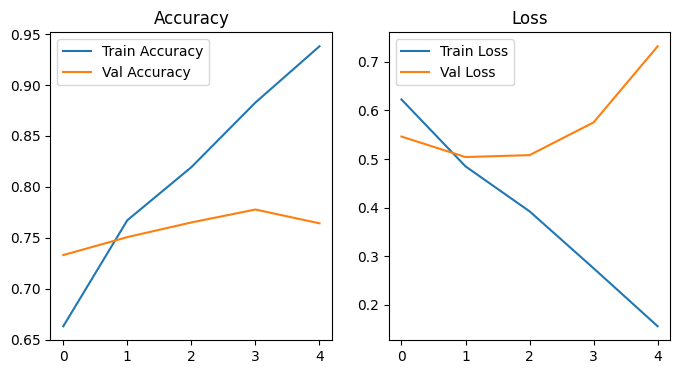

In [ ]:
 acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Train Accuracy')
plt.plot(val_acc, label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()

Висновок:В цій лабораторній роботі ми робили класифікацію котів та собак.Та робили згорткову модель